Hello everyone.This is a notebook comparing various regression models such as Ridge,Knn,Bayesian Regression,Decision Tree and SVM. This is to get an insight as to how different algorithms work and also which algorithms can perform better in some cases depending upon cases.

In [1]:

# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cross_validation import cross_val_score, KFold

C:\Users\Amrita\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Amrita\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the CSV file to a Pandas Dataframe

df=pd.read_csv("movie_metadata.csv")

In [3]:
#Getting non object elements

X_data=df.dtypes[df.dtypes!='object'].index
X_train=df[X_data]
X_train.head()[:2]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0


In [4]:
# Filling all Null values
X = X_train.fillna(0)
y=X['imdb_score']
X.drop(['imdb_score'],axis=1,inplace=True)

In [5]:
X  = X.values
y  = y.values

In [6]:
# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['imdb_score']
X_train.drop(['imdb_score'],axis=1,inplace=True)
X_train.head()[:2]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


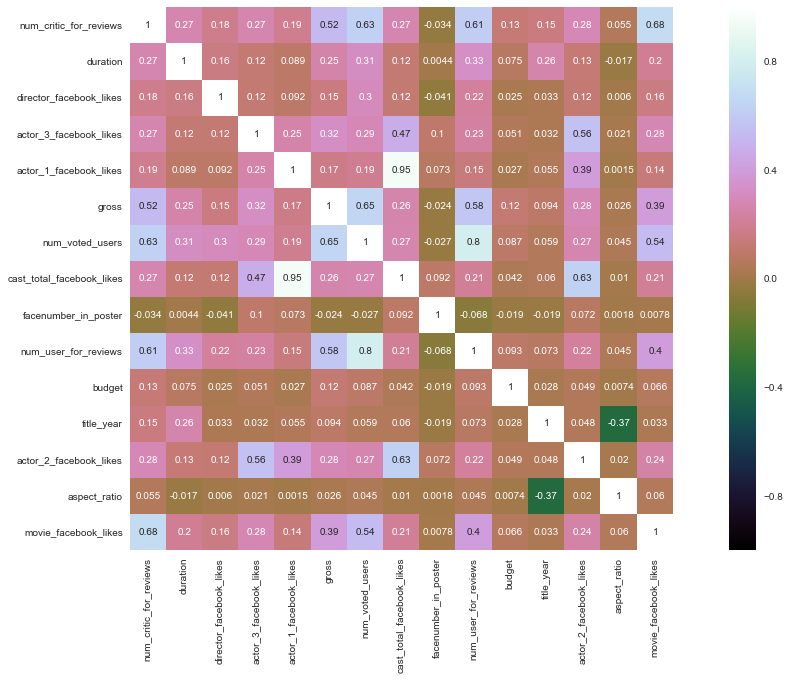

In [7]:

# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [10]:

X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

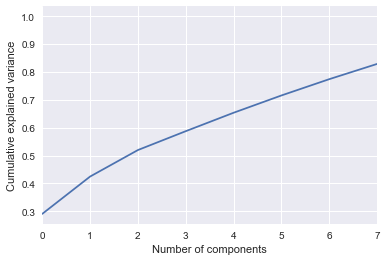

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Since 5 components can explain more than 70% of the variance, we choose the number of the components to be 5

(-2, 2)

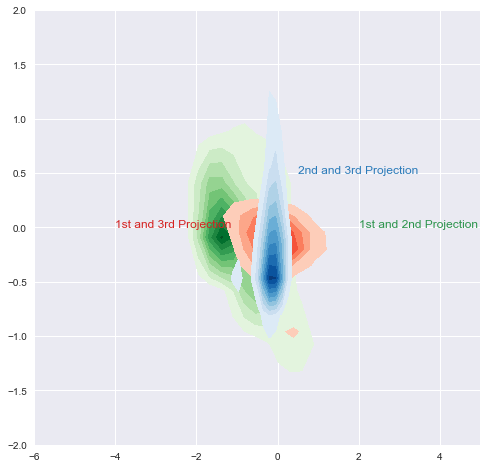

In [12]:
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [13]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)

# Ridge Regression

In [15]:
model=linear_model.Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

score_ridge= model.score(x_test,y_test)
print('Variance score: %.2f' % score_ridge)
#cv_score(model,X_train,y)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")


Train error = 13.91422673402099 percent in Ridge Regression
Variance score: 0.08
Test error = 15.299716605526271 percent in Ridge Regression


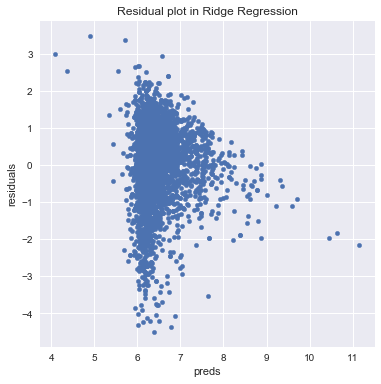

In [16]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

# Knn Algorithm

In [17]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)

score_knn= knn.score(x_test,y_test)
print('Variance score: %.2f' % score_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Variance score: 0.17
Train error = 10.812937212714084 percent in Knn algorithm
Test error = 6.878221673331934 percent in knn algorithm


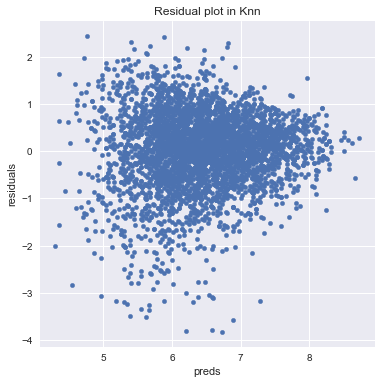

In [18]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

# Bayesian Regression

In [19]:
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

score_bay= reg.score(x_test,y_test)
print('Variance score: %.2f' % score_bay)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_bay=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_bay=(error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Variance score: 0.09
Train error = 13.917496613663147 percent in Bayesian Regression
Test error = 0.025287435537395844 percent in Bayesian Regression


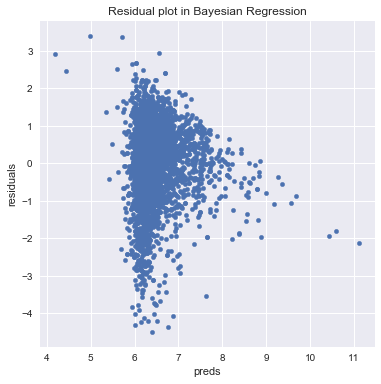

In [20]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

# Decision Tree Regressor

In [21]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)
score_tree= dec.score(x_test,Y_test)
print('Variance score: %.2f' % score_tree)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-Y_test[i])/Y_test[i])
test_error_tree=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Variance score: 0.22
Train error = 14.590941891509965 percent in Decision Tree Regressor
Test error = 5.816650087351868 percent in Decision Tree Regressor


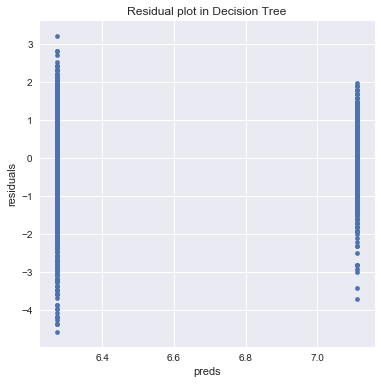

In [22]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

# Support Vector Machines(SVM)

In [23]:

svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

score_svm= svm_reg.score(x_test,y_test)
print('Variance score: %.2f' % score_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-Y_test[i])/Y_test[i])
test_error_svm=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Variance score: 0.26
Train error = 12.036337747988664 percent in SVM Regressor
Test error = 5.403852057484059 percent in SVM Regressor


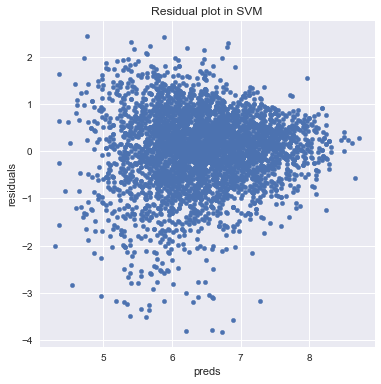

In [24]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

In [25]:

train_error=[train_error_ridge,train_error_knn,train_error_bay,train_error_tree,train_error_svm]
test_error=[test_error_ridge,test_error_knn,test_error_bay,test_error_tree,test_error_svm]
test_score=[score_ridge* 100,score_knn*100,score_bay*100,score_tree*100,score_svm*100]

col={'Train Error':train_error,'Test Error':test_error, 'Test Score': test_score}
models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM']
df=DataFrame(data=col,index=models)
df

,Test Error,Test Score,Train Error
Ridge Regression,15.299717,8.125680,13.914227
Knn,6.878222,16.701942,10.812937
Bayesian Regression,0.025287,8.818034,13.917497
Decision Tree,5.816650,22.257118,14.590942
SVM,5.403852,25.618394,12.036338


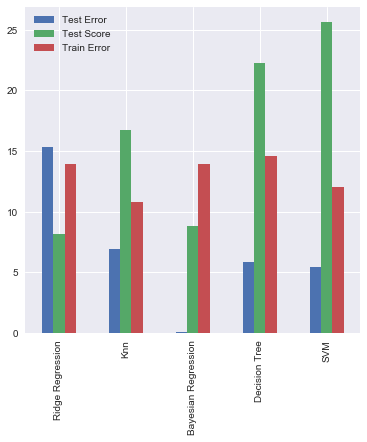

In [26]:
df.plot(kind='bar')

The right way to cross-validate
To prevent overfitting, we can't let any information about the full dataset leak into cross-validation. Thus, we must re-select good features in each cross-validation iteration

In [27]:
#Ridge Regression
model=linear_model.Ridge()

#KNN Regression
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')

#Bayesian Ridge
reg = linear_model.BayesianRidge()

#Decision Tree Regression
dec = tree.DecisionTreeRegressor(max_depth=1)

#SVM Regression
svm_reg=svm.SVR()

def cv_score(model):
    scores = []

    for train, test in KFold(len(y), n_folds=5):
        xtrain, xtest, ytrain, ytest = X[train], X[test], y[train], y[test]
    
        b = SelectKBest(f_regression, k=10)
        b.fit(xtrain, ytrain)
        xtrain = xtrain[:, b.get_support()]
        xtest = xtest[:, b.get_support()]
    
        model.fit(xtrain, ytrain)    
        scores.append(model.score(xtest, ytest))

        yp = model.predict(xtest)
        plt.plot(yp, ytest, 'o')
        plt.plot(ytest, ytest, 'r-')
    
        plt.xlabel("Predicted")
        plt.ylabel("Observed")
        #np.mean(scores)

        print("CV Score is ", np.mean(scores))

CV Score is  0.249166168675
CV Score is  0.29446712063
CV Score is  0.298621732631
CV Score is  0.284360347001
CV Score is  0.239481118507


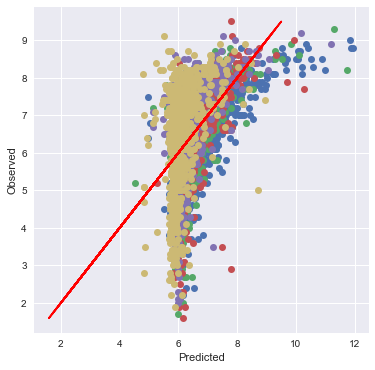

In [28]:
cv_score(model)


CV Score is  0.0408604173756
CV Score is  0.0440103285967
CV Score is  0.053957507882
CV Score is  0.0454220821645
CV Score is  0.0453074426498


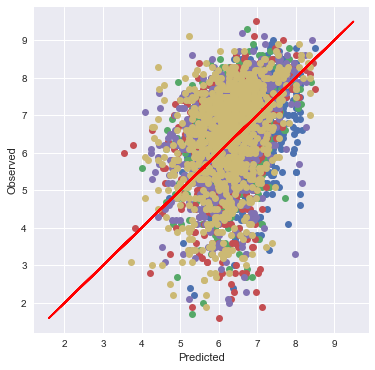

In [29]:
cv_score(knn)

CV Score is  0.246905387302
CV Score is  0.293196259464
CV Score is  0.297732661651
CV Score is  0.283343514369
CV Score is  0.239556005261


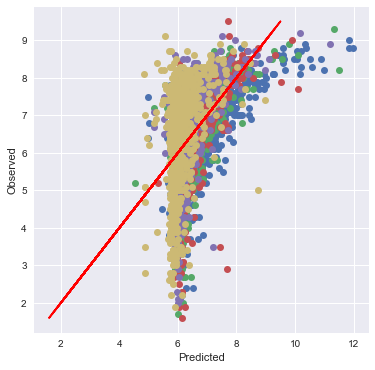

In [30]:
cv_score(reg)

CV Score is  0.0013751255327
CV Score is  0.0929231172447
CV Score is  0.119990435463
CV Score is  0.104496956516
CV Score is  0.0916898447383


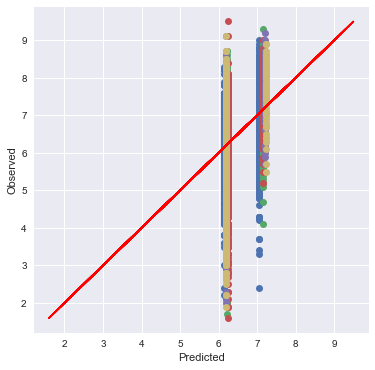

In [31]:
cv_score(dec)

CV Score is  0.00657094200596
CV Score is  -5.40659716785e-05
CV Score is  0.00118179971011
CV Score is  0.00385894887001
CV Score is  0.00568088840601


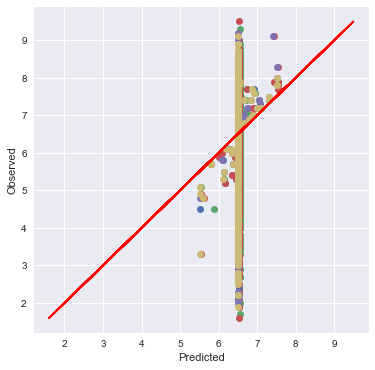

In [32]:
cv_score(svm_reg)